In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from scipy.stats import norm
import statistics

In [ ]:
data=pd.read_csv("/content/walmart_data.txt")

In [ ]:
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
data.isnull()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
550063,False,False,False,False,False,False,False,False,False,False
550064,False,False,False,False,False,False,False,False,False,False
550065,False,False,False,False,False,False,False,False,False,False
550066,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


mean purchase is 9324 and min purchase price is 185. Maximum purchase price is 23961

<Axes: xlabel='Gender', ylabel='Purchase'>

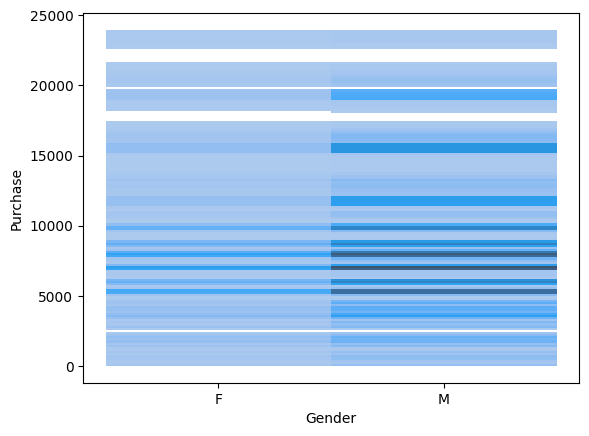

In [ ]:
sns.histplot(data=data,x=data.Gender,y=data.Purchase)

<Axes: xlabel='Age', ylabel='Purchase'>

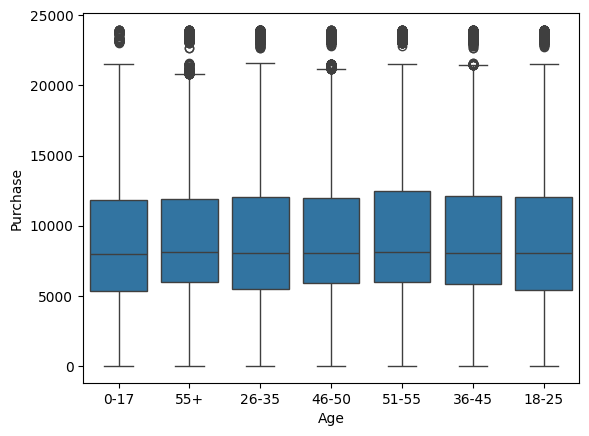

In [ ]:
sns.boxplot(data=data,x=data.Age,y=data.Purchase)

In [ ]:
#Status=pd.pivot_table(data=data)


In [ ]:
grpdata=data.groupby('Gender').mean('Purchase')
grpdata

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
Gender,,,,,
F,1.003130e+06,6.74054,0.419619,5.717714,8734.565765
M,1.002996e+06,8.51475,0.406386,5.301512,9437.526040


As per the above grouped data, male customers spend average of 9437 currency per transaction compared to female customers(8734 currency)

In [ ]:
data.Occupation.sort_values()

550067     0
221158     0
221157     0
221156     0
221155     0
          ..
28521     20
28520     20
28519     20
98909     20
98295     20
Name: Occupation, Length: 550068, dtype: int64

In [ ]:
grp=data.groupby('Gender').median('Occupation')
grp

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
Gender,,,,,
F,1003159.0,4.0,0.0,5.0,7914.0
M,1003041.0,7.0,0.0,5.0,8098.0


Based on the above data, median of female occupation is less than the median of male occupation. This could be one of the reason for male customers spending more than female customers.

In [ ]:
citygrpF=data[data['Gender']=="F"].groupby('City_Category').aggregate('City_Category')
citygrpF.describe()

,count,unique,top,freq
City_Category,,,,
A,35704,1,A,35704
B,57796,1,B,57796
C,42309,1,C,42309


In [ ]:
citygrpM=data[data['Gender']=="M"].groupby('City_Category').aggregate('City_Category')
citygrpM.describe()

,count,unique,top,freq
City_Category,,,,
A,112016,1,A,112016
B,173377,1,B,173377
C,128866,1,C,128866


In [ ]:
population=data['Purchase']
population

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

As per the above data, famale count is less in all the city catogeries in comparison with male. Therefore, the spending pattern also is higher from male than female.

In [ ]:
population=data['Purchase'].dropna()
stddev1=statistics.stdev(population)
stddev1



5023.065393820583

In [ ]:
# @title Default title text


In [ ]:
sample=np.random.choice(data['Purchase'],size=2500000)

In [ ]:
stddevsam=stddev1/np.sqrt(2500000)
stddevsam

3.1768654960887424

In [ ]:
# mean of the entire population
mu = data['Purchase'].mean()
mu

9263.968712959126

In [ ]:
sigma = data['Purchase'].std()
sigma

5023.065393820582

In [ ]:
sample_30 = [np.mean(data['Purchase'].sample(30)) for i in range(10000)]

<Axes: ylabel='Count'>

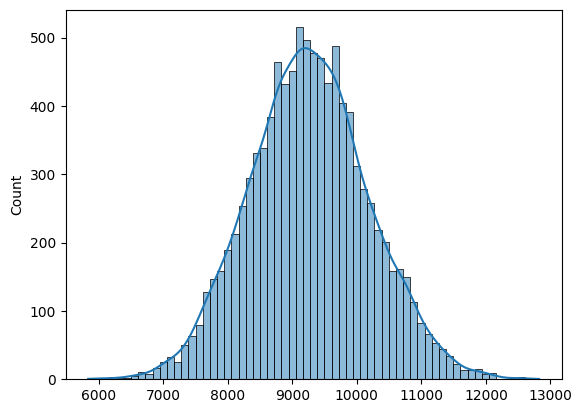

In [ ]:
sns.histplot(sample_30, kde=True) #total population sample distribution

In [ ]:
sample_100 = [np.mean(data['Purchase'].sample(100)) for i in range(10000)]

<Axes: ylabel='Count'>

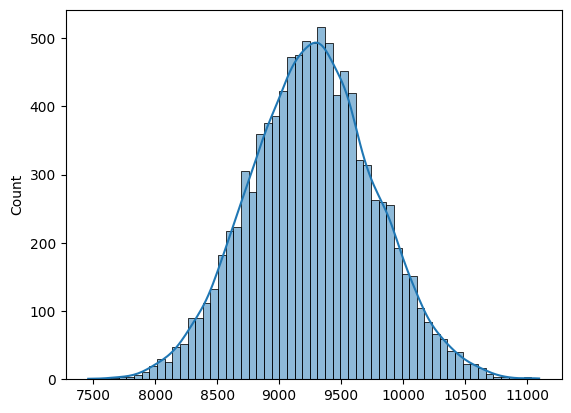

In [ ]:
sns.histplot(sample_100, kde=True) #total population sample distribution

In [ ]:
#female population sample distribution
sampledata=data[data['Gender']=="F"]
sampledata.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378


In [ ]:
# mean of the female population
muf = sampledata['Purchase'].mean()
muf

8734.565765155476

In [ ]:
sigma = sampledata['Purchase'].std()
sigma

4767.233289291458

In [ ]:
Fsample_30 = [np.mean(sampledata['Purchase'].sample(100)) for i in range(10000)]

<Axes: ylabel='Count'>

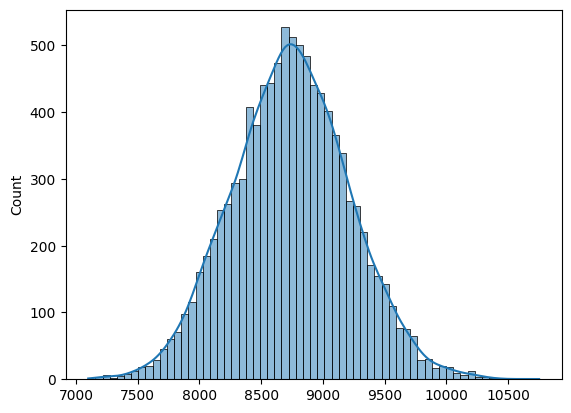

In [ ]:
sns.histplot(Fsample_30, kde=True) #Female sample distribution

In [ ]:
np.mean(Fsample_30)

8742.398247

In [ ]:
np.std(Fsample_30)

473.5391650154367

In [ ]:
#male population sample distribution
sampledataM=data[data['Gender']=="M"]
sampledataM.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686


In [ ]:
# mean of the female population
mum = sampledataM['Purchase'].mean()
mum

9437.526040472265

In [ ]:
Msigma = sampledataM['Purchase'].std()
Msigma

5092.18620977797

In [ ]:
Msample_30 = [np.mean(sampledataM['Purchase'].sample(100)) for i in range(10000)]

<Axes: ylabel='Count'>

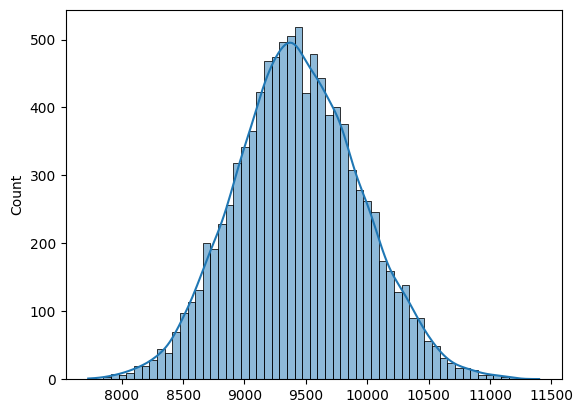

In [ ]:
sns.histplot(Msample_30, kde=True) #Male sample distribution

In [ ]:
mu=np.mean(Msample_30)
mu

9439.802914999998

In [ ]:
standardev=np.std(Msample_30)
standardev

509.27026540143964

In [ ]:
#90% confidence interval of male population


In [ ]:
z1=norm.ppf(0.1)
z1

-1.2815515655446004

In [ ]:
z2 = norm.ppf(1 - 0.1)
z2

1.2815515655446004

In [ ]:
std_error = 509.27/np.sqrt(100)
std_error


50.927

In [ ]:
x1 = mu + z1 * std_error
x1

9374.537338421509

In [ ]:
x2 = mu + z2 * std_error
x2

9505.068491578488

So the range of 90% confidence interval is [9374.53 , 9505.06
]

In [ ]:
#95% confidence interval of male population

In [ ]:
z1=norm.ppf(0.05)
z1

-1.6448536269514729

In [ ]:
z2 = norm.ppf(1 - 0.05)
z2

1.6448536269514722

In [ ]:
std_error = 509.27/np.sqrt(100)
std_error

50.927

In [ ]:
x1 = mu + z1 * std_error
x1

9356.03545434024

In [ ]:
x2 = mu + z2 * std_error
x2

9523.570375659756

So the range of 95% confidence interval is [9356.03 , 9523.57]

In [ ]:
#99% confidence interval of male population

In [ ]:
z1=norm.ppf(0.01)
z1

-2.3263478740408408

In [ ]:
z2 = norm.ppf(1 - 0.01)
z2

2.3263478740408408

In [ ]:
std_error = 509.27/np.sqrt(100)
std_error

50.927

In [ ]:
x1 = mu + z1 * std_error
x1

9321.32899681872

In [ ]:
x2 = mu + z2 * std_error
x2

9558.276833181277

So the range of 99% confidence interval is [9321.32 , 9558.27]

In [ ]:
#90% confidence interval of female sample population

In [ ]:
mu=np.mean(Fsample_30)
mu

8742.398247

In [ ]:
standardev=np.std(Fsample_30)
standardev

473.5391650154367

In [ ]:
z1=norm.ppf(0.1)
z1

-1.2815515655446004

In [ ]:
z2 = norm.ppf(1 - 0.1)
z2

1.2815515655446004

In [ ]:
std_error = 473.53/np.sqrt(100)
std_error

47.352999999999994

In [ ]:
x1 = mu + z1 * std_error
x1

8681.712935716765

In [ ]:
x2 = mu + z2 * std_error
x2

8803.083558283233

So the range of 90% confidence interval for female population is [8681.71 , 8803.08]

In [ ]:
#95% confidence interval of female population

In [ ]:
z1=norm.ppf(0.05)
z1

-1.6448536269514729

In [ ]:
z2 = norm.ppf(1 - 0.05)
z2

1.6448536269514722

In [ ]:
std_error = 473.53/np.sqrt(100)
std_error

47.352999999999994

In [ ]:
x1 = mu + z1 * std_error
x1

8664.509493202966

In [ ]:
x2 = mu + z2 * std_error
x2

8820.287000797032

So the range of 95% confidence interval for female population is [8664.50, 8820.28]

In [ ]:
#99% confidence interval of female population

In [ ]:
z1=norm.ppf(0.01)
z1

-2.3263478740408408

In [ ]:
z2 = norm.ppf(1 - 0.01)
z2

2.3263478740408408

In [ ]:
std_error = 473.53/np.sqrt(100)
std_error

47.352999999999994

In [ ]:
x1 = mu + z1 * std_error
x1

8632.238696120543

In [ ]:
x2 = mu + z2 * std_error
x2

8852.557797879455

So the range of 95% confidence interval for female population is [8632.23, 8852.55]

Based on the above observation, with 99% confidence

the male population spent around the range [9321.32 , 9558.27]

female population has spent around the range  [8632.23, 8852.55]

In [ ]:
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Age', ylabel='Purchase'>

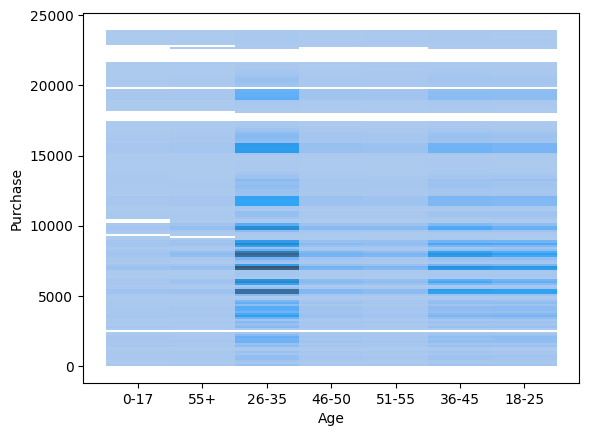

In [ ]:
sns.histplot(data=data,x=data.Age,y=data.Purchase)

<Axes: xlabel='Age', ylabel='Marital_Status'>

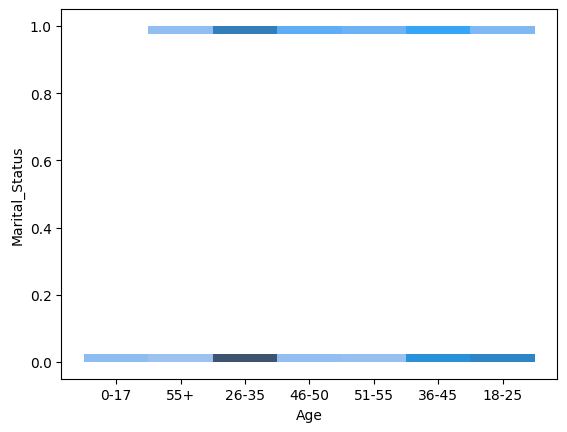

In [ ]:
sns.histplot(data=data,x=data.Age,y=data.Marital_Status)

<Axes: xlabel='Product_Category', ylabel='Purchase'>

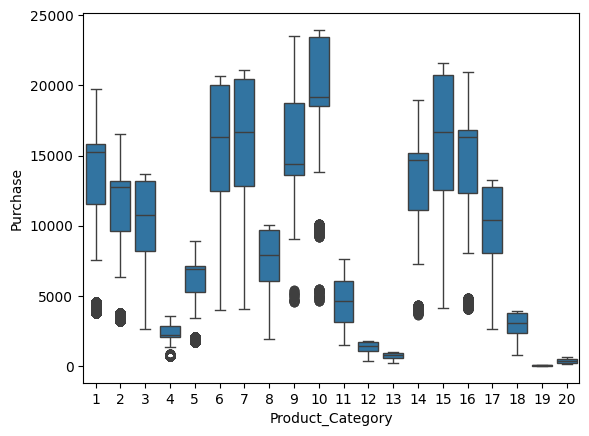

In [ ]:
sns.boxplot(data=data.sort_values('Product_Category'),x=data.Product_Category,y=data.Purchase)

**Observations:**

As per the above observation, majority of the spending is done by the customers of age 26-35. Maximum spending ranges between 5000 to 10000. Also signioficant spending is seen around 15000 and 20000.

Accordingly, customers of age group 18-25 and 36-45 also has spent significant amount between 5000 to 10000.

Based on marital status, most of the customers are unmarried and between age group 26-35. Also significant amount of customers who are married as well range between same age group.

We can also see significant customer base who are unmarried with the age groups of 18-25 and 26-45.

Therefore, we can conclude that most of the customers are between the age groups 18-45 where the maximum purchase value is recorded with the customers  with the age group 26-35 who are also unmarried.

As per the boxplot, the product category 6 and 7 has higher purchases followed by 15, 10 and 9.

Recommendation:

Based on the data majority sales is in the city category B. Therefore, walmart
need to make sure to keep the sales sustainable in city category B.

Next to B, city category A and C also has significant sales however, more marketting strategies are required to increase the sales in these city categories.

Compared to female customers, male customers has hieghtest occupation points which could alo be the reason for higher purchase from male customers.

There is no overlap between the spending pattern of male and female customers. As per the data, male customers spend more than female customers.

With 99% of confidence interval, the spending range of male customers is between 9321.32  and 9558.27 where as the spending range of female customers is between 8632.23 and 8852.55.

As per the data, maximum number of customers range between the age group 26-35. Therefore, the sale cost and the products should be more appealing to this age group.

As per the data, the product category of 6 and 7 are more appealing to the overall population. Therefore, the focus should also be more on the sales of products categories 6,7 and 15.

The mean spending vale of the female customers was 8734 and for male customers is 9437. However, excluding outliers and with sample testing, the rage of spending is around 8632 and 8852 for female customers and 9321 and 9558 for male customers.

*   Therefore, the products with these price ranges will be more appealing to the
respective customers as it would be more affordable as per their spending patterns.
*   The marketing strategies  should also be more focused towards the spending range to make sure the sales sustain.






